# Web Scraping

**Project Outline :**
- **Objective:** Scrape essential mobile details (model name, ratings, reviews, prices) from Flipkart for informed purchasing decisions.

- **Data Source:** Targeted URL: [Flipkart Mobile Search](https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off)

- **Methodology:** Utilize Python, requests, and BeautifulSoup for effective web scraping. Implement a loop for extracting key details from mobile listings.

- **CSV Creation:** Generate a CSV file to compile and organize the extracted information for seamless analysis.

- **Challenges:** Overcome potential issues related to dynamic web content and anti-scraping measures on the Flipkart website.

- **Conclusion:** Successful execution will yield a structured dataset, enabling insightful analysis of mobile details for better decision-making.

In [1]:
!pip install requests --upgrade --quiet

In [2]:
#Load required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re


In [3]:
# Define the Flipkart search URL for phones
text_url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [4]:
# Send an HTTP GET request to the specified URL
response = requests.get(text_url)

In [5]:
# Check the HTTP status code of the response
response.status_code

200

In [6]:
# Get the content (HTML) of the response and store it in the variable 's'
s = response.text

In [7]:
# Calculate the length of the content
len(s)

142202

In [8]:
s[:10000]

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" siz

In [9]:
# Save the entire HTML content to a file named 'webpage.html'
with open('webpage.html','w',encoding='utf-8') as f:
    f.write(s)

In [10]:
# Parse the HTML content using BeautifulSoup
doc = BeautifulSoup(s, 'html.parser')

In [11]:
doc

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72

In [12]:
# Find all tags with the specified class (presumably model names)
selection_class = "_4rR01T"

model_tags = doc.find_all('div', {'class': selection_class})
len(model_tags)

24

In [13]:
model_tags[0].text

'OPPO Reno11 5G (Wave Green, 128 GB)'

In [14]:
#Excrating model name from model tags
model = []
for tag in  model_tags:
    model.append(tag.text)
    
print(model)

['OPPO Reno11 5G (Wave Green, 128 GB)', 'SAMSUNG Galaxy F04 (Opal Green, 64 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'Apple iPhone 14 (Midnight, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'SAMSUNG Galaxy F04 (Jade Purple, 64 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'Apple iPhone 15 (Blue, 128 GB)', 'Apple iPhone 14 (Starlight, 128 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'Apple iPhone 14 (Purple, 128 GB)', 'SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'POCO C51 - Locked with Airtel Prepaid (Royal Blue, 64 GB)', 'SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'POCO C51 (Power Black, 64 GB)', 'Motorola Edge 40 Neo (Peach Fuzz, 256 GB)', 'SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)']


In [15]:
span_tag = doc.find_all('span',{'class':'_2_R_DZ'})
len(span_tag)

24

In [16]:
span_tag[:10]

[<span class="_2_R_DZ"><span><span>249 Ratings </span><span class="_13vcmD">&amp;</span><span> 26 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>92,780 Ratings </span><span class="_13vcmD">&amp;</span><span> 5,249 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>3,25,460 Ratings </span><span class="_13vcmD">&amp;</span><span> 18,201 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>3,25,460 Ratings </span><span class="_13vcmD">&amp;</span><span> 18,201 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>3,25,460 Ratings </span><span class="_13vcmD">&amp;</span><span> 18,201 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>60,733 Ratings </span><span class="_13vcmD">&amp;</span><span> 3,611 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>1,51,679 Ratings </span><span class="_13vcmD">&amp;</span><span> 8,100 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>1,51,679 Ratings </spa

In [17]:
span_tag[0].text

'249 Ratings\xa0&\xa026 Reviews'

In [18]:
span_tag[0].text.split()

['249', 'Ratings', '&', '26', 'Reviews']

In [19]:
#Excrating Ratings name from Ratings tags
Ratings = []

for tag in span_tag:
    Ratings.append(tag.text.split()[0])
    
print(Ratings)

['249', '92,780', '3,25,460', '3,25,460', '3,25,460', '60,733', '1,51,679', '1,51,679', '1,51,679', '2,69,549', '60,733', '92,780', '60,733', '9,510', '2,69,549', '84,499', '2,69,549', '84,499', '34,314', '1,69,584', '1,97,696', '1,69,584', '34,143', '34,314']


In [20]:
#Excrating Reviews name from Reviews tags
Reviews = []

for tag in span_tag:
    Reviews.append(tag.text.split()[3])
    
print(Reviews)

['26', '5,249', '18,201', '18,201', '18,201', '3,611', '8,100', '8,100', '8,100', '10,530', '3,611', '5,249', '3,611', '616', '10,530', '6,120', '10,530', '6,120', '2,261', '9,445', '11,323', '9,445', '4,623', '2,261']


In [21]:
len(Reviews)

24

In [22]:
selection_class = "_30jeq3 _1_WHN1"

price_tags = doc.find_all('div', {'class': selection_class})
len(model_tags)

24

In [23]:
price_tags[:10]

[<div class="_30jeq3 _1_WHN1">₹29,999</div>,
 <div class="_30jeq3 _1_WHN1">₹5,999</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹14,999</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>,
 <div class="_30jeq3 _1_WHN1">₹57,999</div>]

In [24]:
price = []

for tag in price_tags:
    price.append(tag.text)
    
print(price)

['₹29,999', '₹5,999', '₹12,999', '₹12,999', '₹12,999', '₹14,999', '₹11,999', '₹11,999', '₹11,999', '₹57,999', '₹14,999', '₹5,999', '₹14,999', '₹66,999', '₹57,999', '₹10,990', '₹57,999', '₹10,990', '₹9,990', '₹5,399', '₹7,499', '₹5,699', '₹24,999', '₹9,990']


In [25]:
# Create a dictionary with extracted information and convert it to a DataFrame
mb_dict = {
    'Model':model,
    'Ratings':Ratings,
    'Reviews':Reviews,
    'Price':price
}

In [26]:
#Create daata frame of mobile datasets
mb_df = pd.DataFrame(mb_dict)
mb_df

,Model,Ratings,Reviews,Price
0,"OPPO Reno11 5G (Wave Green, 128 GB)",249,26,"₹29,999"
1,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","92,780","5,249","₹5,999"
2,"vivo T2x 5G (Aurora Gold, 128 GB)","3,25,460","18,201","₹12,999"
3,"vivo T2x 5G (Marine Blue, 128 GB)","3,25,460","18,201","₹12,999"
4,"vivo T2x 5G (Glimmer Black, 128 GB)","3,25,460","18,201","₹12,999"
5,"vivo T2x 5G (Aurora Gold, 128 GB)","60,733","3,611","₹14,999"
6,"vivo T2x 5G (Marine Blue, 128 GB)","1,51,679","8,100","₹11,999"
7,"vivo T2x 5G (Glimmer Black, 128 GB)","1,51,679","8,100","₹11,999"
8,"vivo T2x 5G (Aurora Gold, 128 GB)","1,51,679","8,100","₹11,999"
9,"Apple iPhone 14 (Midnight, 128 GB)","2,69,549","10,530","₹57,999"


In [27]:
#Saving CSV files
mb_df.to_csv('Flipkart_phone')

**Web scraping assigment conclusion :**
 - Scrape details of 24 mobiles detail from flikart.
 - Then conveerted into dataframe and stored in localhost.

# Data Analysis

In [28]:
#Loading required libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


## Data Preprocessing
- Dealing with Duplicates
- Dealing with missing values
- Dealing with Object value

In [29]:
mb_df.head()

,Model,Ratings,Reviews,Price
0,"OPPO Reno11 5G (Wave Green, 128 GB)",249,26,"₹29,999"
1,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","92,780","5,249","₹5,999"
2,"vivo T2x 5G (Aurora Gold, 128 GB)","3,25,460","18,201","₹12,999"
3,"vivo T2x 5G (Marine Blue, 128 GB)","3,25,460","18,201","₹12,999"
4,"vivo T2x 5G (Glimmer Black, 128 GB)","3,25,460","18,201","₹12,999"


In [30]:
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    24 non-null     object
 1   Ratings  24 non-null     object
 2   Reviews  24 non-null     object
 3   Price    24 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes


In [31]:
mb_df.nunique()

Model      17
Ratings    12
Reviews    12
Price      13
dtype: int64

In [32]:
def clean_convert(value):
    clean_value = value.replace('₹','').replace(',','')
    return int(clean_value)

In [33]:
mb_df.columns

Index(['Model', 'Ratings', 'Reviews', 'Price'], dtype='object')

In [34]:
mb_df[['Ratings', 'Reviews', 'Price']] = mb_df[['Ratings', 'Reviews', 'Price']].applymap(clean_convert)
mb_df.head()

,Model,Ratings,Reviews,Price
0,"OPPO Reno11 5G (Wave Green, 128 GB)",249,26,29999
1,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",92780,5249,5999
2,"vivo T2x 5G (Aurora Gold, 128 GB)",325460,18201,12999
3,"vivo T2x 5G (Marine Blue, 128 GB)",325460,18201,12999
4,"vivo T2x 5G (Glimmer Black, 128 GB)",325460,18201,12999


In [35]:
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    24 non-null     object
 1   Ratings  24 non-null     int64 
 2   Reviews  24 non-null     int64 
 3   Price    24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 900.0+ bytes


In [36]:
mb_df.shape

(24, 4)

In [37]:
mb_df.describe()

,Ratings,Reviews,Price
count,24.000000,24.000000,24.000000
mean,142758.958333,7669.333333,20355.833333
std,105997.032493,5189.401320,19116.949460
min,249.000000,26.000000,5399.000000
25%,60733.000000,3611.000000,9990.000000
50%,122229.500000,7110.000000,12499.000000
75%,215659.250000,10530.000000,17499.000000
max,325460.000000,18201.000000,66999.000000


In [38]:
mb_df.isnull().sum()

Model      0
Ratings    0
Reviews    0
Price      0
dtype: int64

In [39]:
mb_df.duplicated().sum()

0

---
---

## EDA Analysis

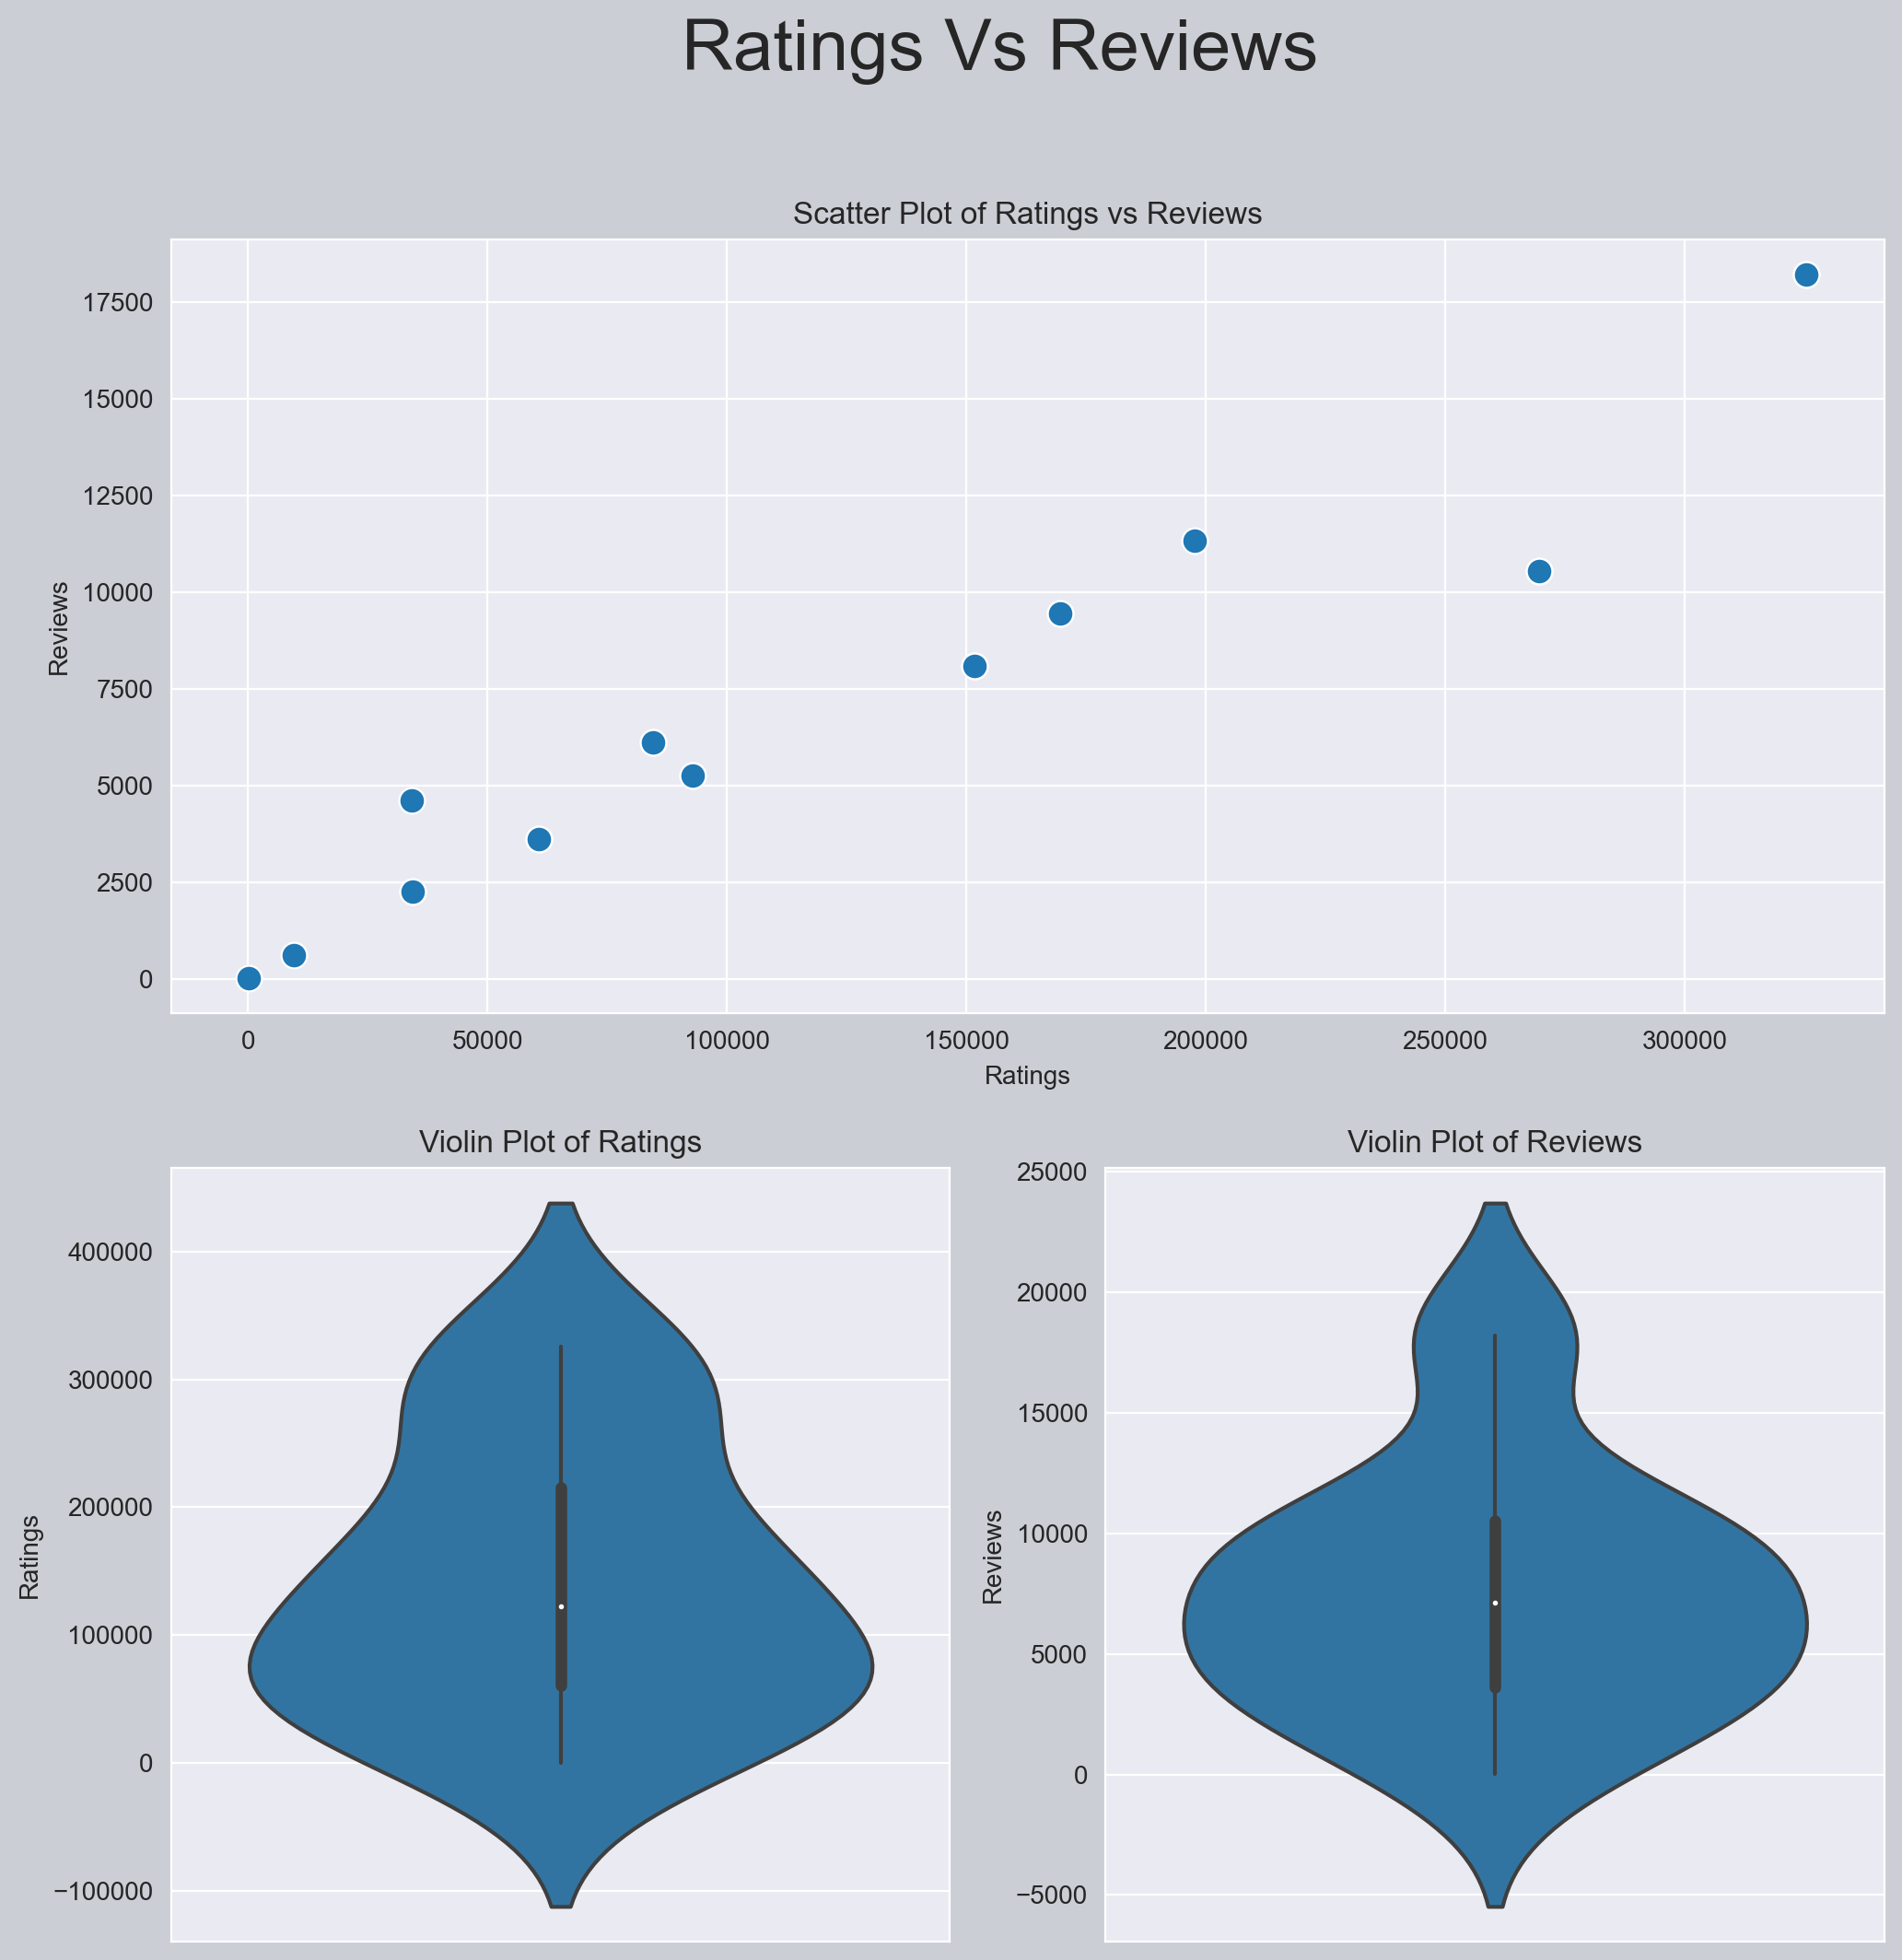

In [40]:
# Set the figure size, DPI, and background color
plt.figure(figsize=(12, 12), dpi=200, facecolor='#cbced4')

# Add a super title for the entire figure
plt.suptitle('Ratings Vs Reviews', fontsize=28)

# Create the first subplot (scatter plot)
plt.subplot(2, 1, 1)
sns.scatterplot(x='Ratings', y='Reviews', data=mb_df, s=100)
plt.title('Scatter Plot of Ratings vs Reviews')

# Create the second subplot (violin plot for Ratings)
plt.subplot(2, 2, 3)
sns.violinplot(y='Ratings', data=mb_df)
plt.title('Violin Plot of Ratings')

# Create the third subplot (violin plot for Reviews)
plt.subplot(2, 2, 4)
sns.violinplot(y='Reviews', data=mb_df)
plt.title('Violin Plot of Reviews')

# Show the plot
plt.show()


**Observation on Ratings Vs Reviews :**
 - There is a relation between Ratings and Reviews
 - As Ratings of mobilephone increase, reviews also increase.
 - Highest phone can be seen on the range of reviews of 500 and ratings of 10000

---
---

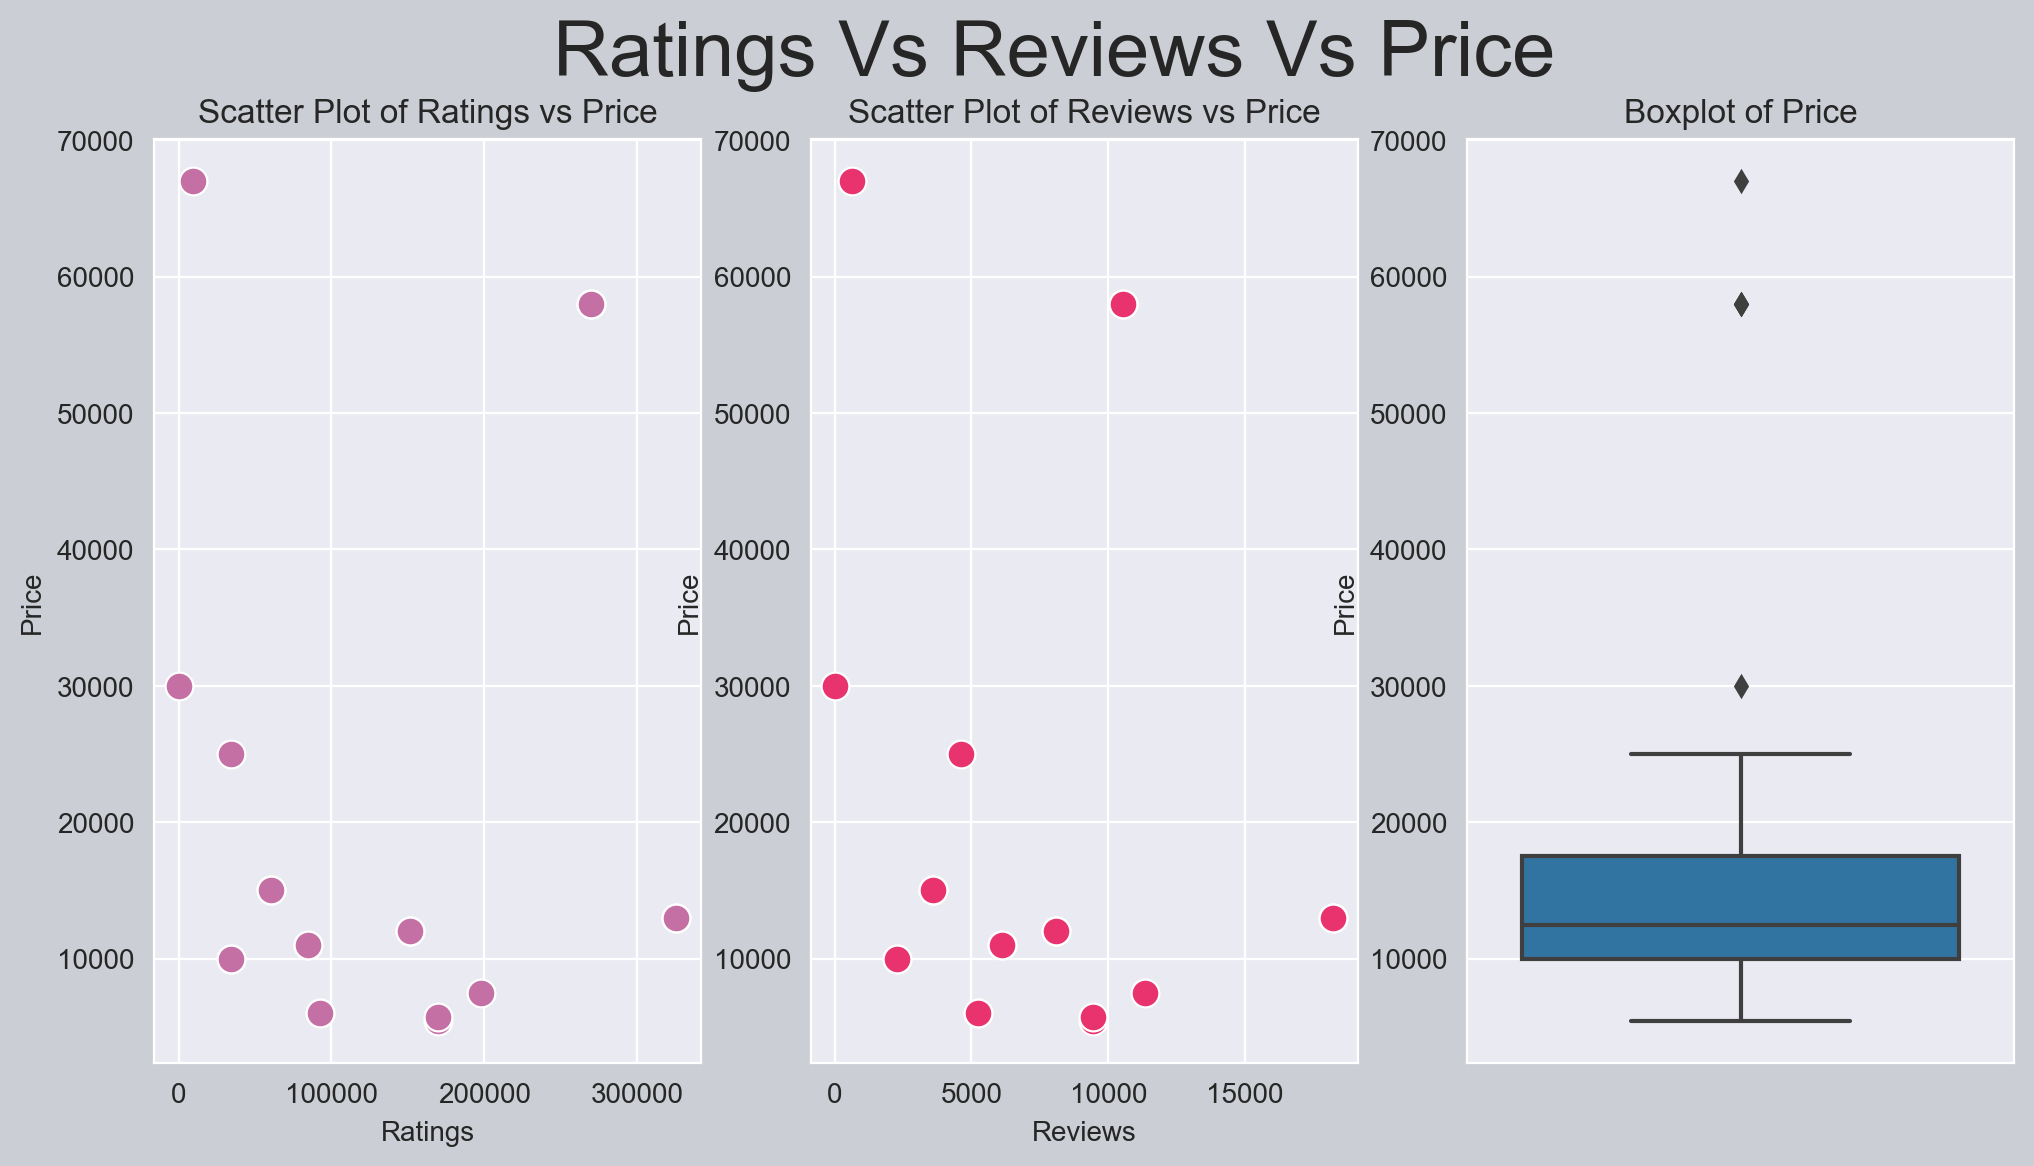

In [41]:
# Set the figure size, DPI, and background color
plt.figure(figsize=(12, 6), dpi=200, facecolor='#cbced4')

# Add a super title for the entire figure
plt.suptitle('Ratings Vs Reviews Vs Price', fontsize=28)

# Create the first subplot (scatter plot of Ratings vs Price)
plt.subplot(1, 3, 1)
sns.scatterplot(x='Ratings', y='Price', data=mb_df, s=100, color="#c470a5")
plt.title('Scatter Plot of Ratings vs Price')

# Create the second subplot (scatter plot of Reviews vs Price)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Reviews', y='Price', data=mb_df, s=100, color="#e8336f")
plt.title('Scatter Plot of Reviews vs Price')

# Create the third subplot (boxplot for Price)
plt.subplot(1, 3, 3)
sns.boxplot(y='Price', data=mb_df)
plt.title('Boxplot of Price')

# Show the plot
plt.show()


**Observation on Ratings Vs Price :**
 - Above graph show that Price and Ratings does not have any relatationship.
 - Also show that Price and Reviews does not have any relatationship
 - Highest phone segment can be seen in the price around 18000.

---
---

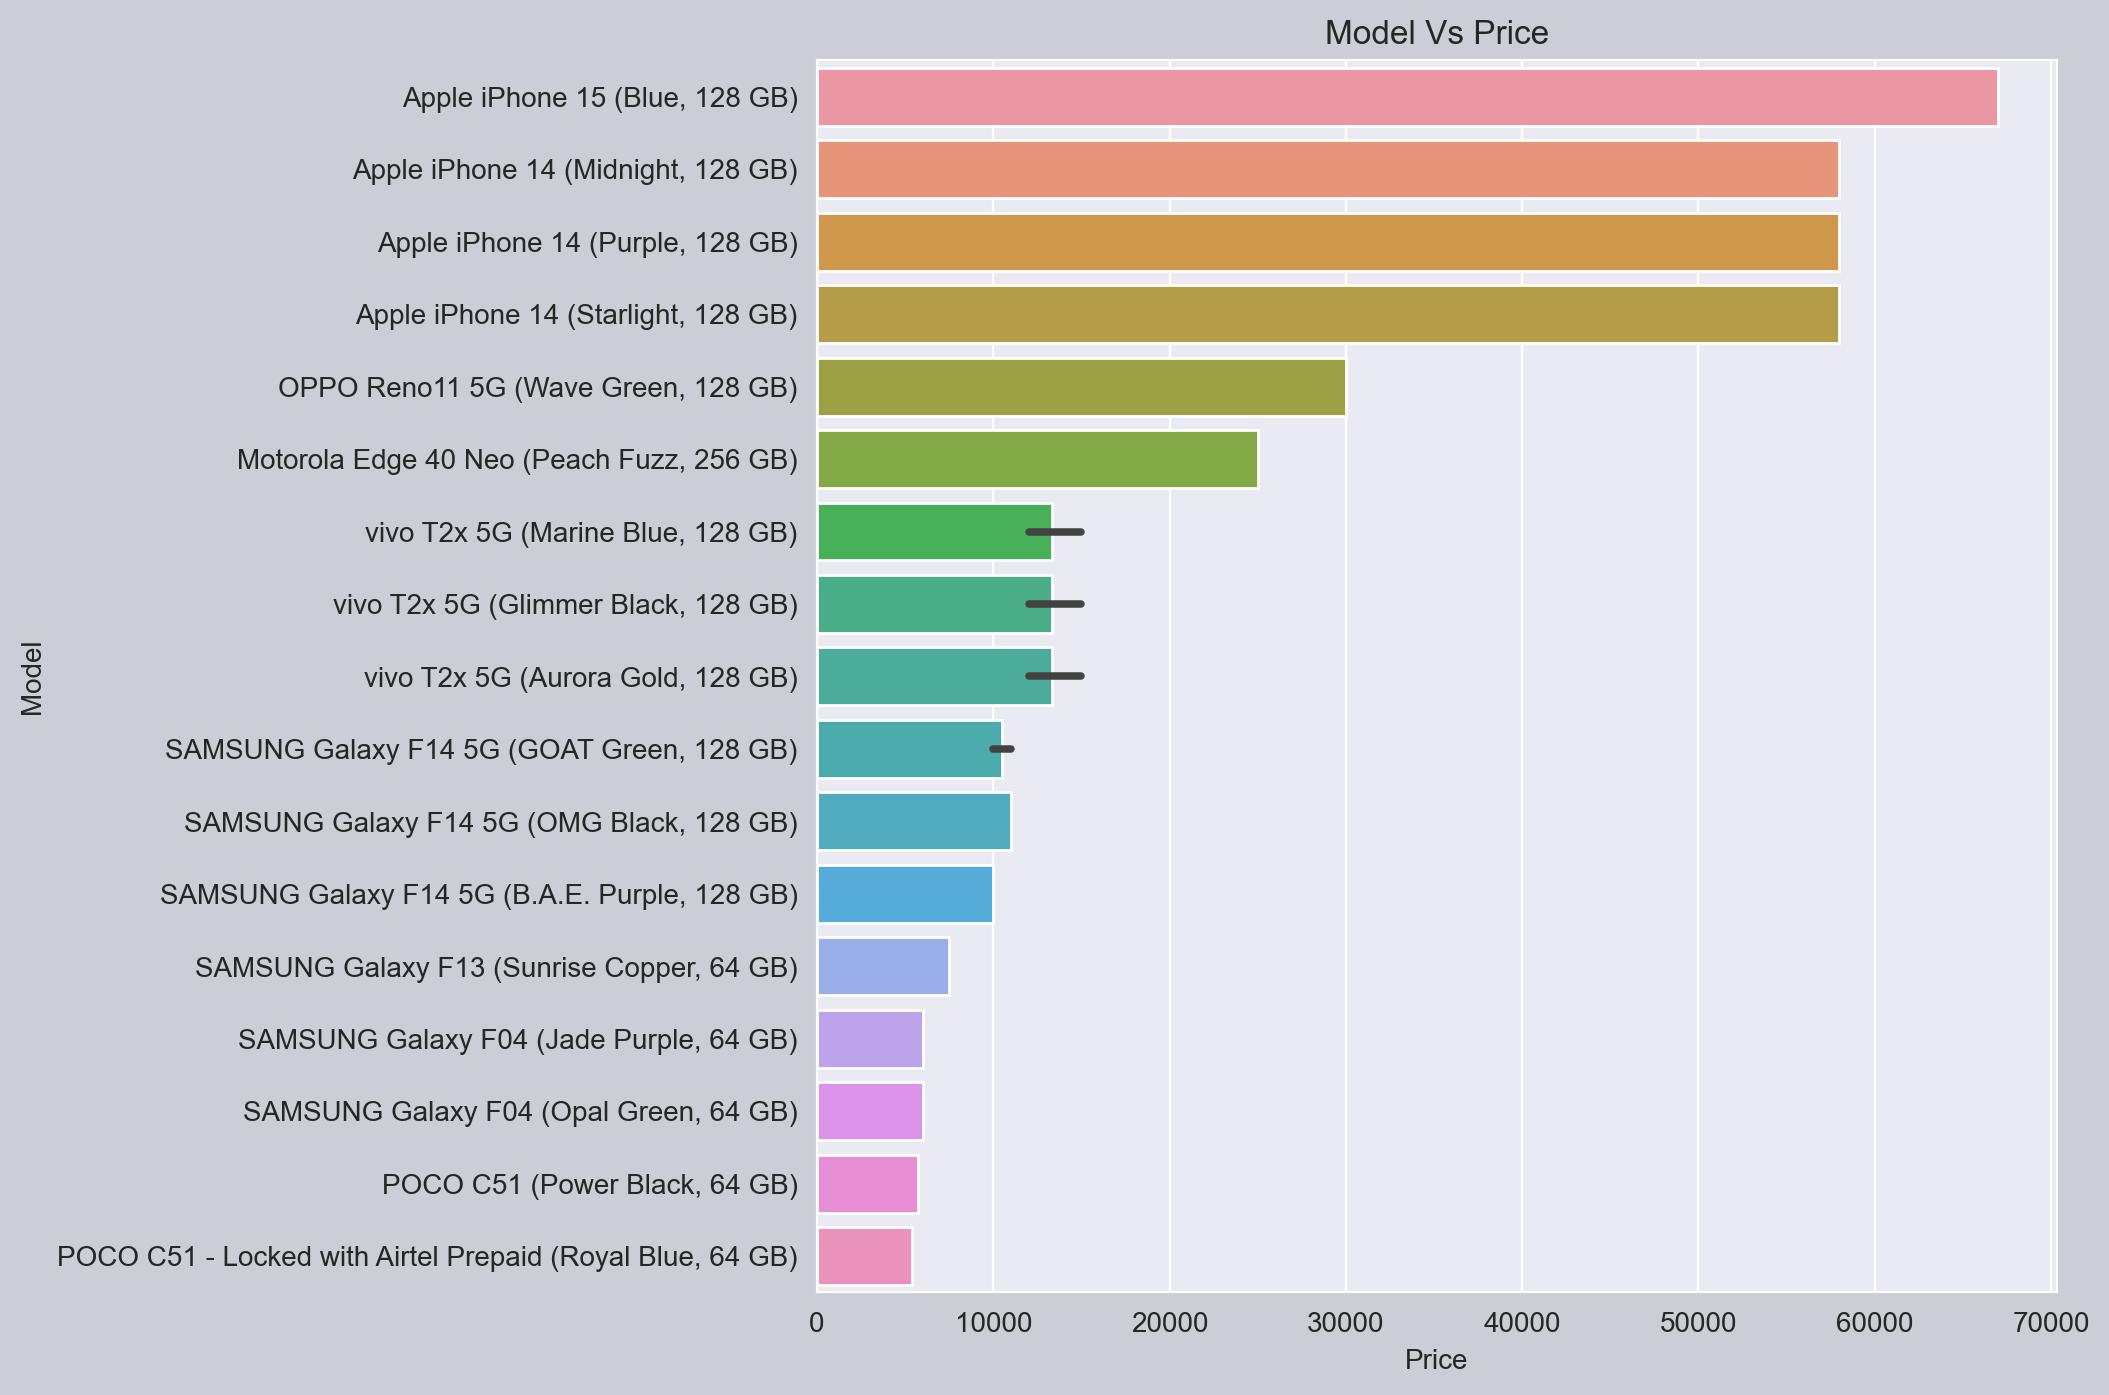

In [42]:
# Sort the DataFrame by 'Price' in descending order
bar_df = mb_df.sort_values(by='Price', ascending=False)

# Set the figure size, DPI, and background color
plt.figure(figsize=(8, 8), dpi=200, facecolor='#cbced4')

# Create a bar plot of 'Price' vs 'Model'
sns.barplot(x='Price', y='Model', data=bar_df)

# Add a title to the plot
plt.title("Model Vs Price")

# Show the plot
plt.show()


**Observation on Model Vs Price :**

 - From above analysis, we can find that apple brand phones are more expensive than other brand.
 - Vivo and Motorola are major player on mid segment.
 - We can find more economy cheap phone from samsung phone.
 - Among all mobile phone, Apple iphone 15 cost highest rate with 66999 rupees and most cheapest economy phone id with POCO C51 - Locked with Airtel Prepaid .

---
---

**Project Outline: Web Scraping and Data Analysis of Mobile Phones on Flipkart**

1. **Web Scraping:**
    - Target website: [Flipkart Mobiles](https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off)
    - Scrape details of 24 mobile phones.
    - Extract information such as model name, ratings, reviews, and price for each phone.

2. **Data Conversion and Storage:**
    - Convert scraped data into a DataFrame.
    - Store the DataFrame in the local machine for further analysis.

3. **Data Preprocessing:**
    - Deal with duplicate entries if any.
    - Handle missing values in the dataset.
    - Address any issues related to object-type data.

4. **Observation on Ratings vs. Reviews:**
    - Explore the relationship between Ratings and Reviews.
    - Visualize the data to understand patterns.
    - Conclude if there's a correlation between higher ratings and more reviews.

5. **Observation on Ratings vs. Price:**
    - Analyze the correlation between Ratings and Price.
    - Check if higher-rated phones tend to be more expensive.
    - Visualize the data to present the findings.

6. **Observation on Model vs. Price:**
    - Investigate the relationship between different mobile phone models and their prices.
    - Identify any patterns or trends in the pricing of specific brands or models.
    - Create visual representations for better understanding.

7. **Conclusion:**
    - Summarize the key findings from the analysis.
    - Present insights on the relationship between ratings, reviews, and prices.
    - Highlight any notable trends or observations regarding specific brands or models.

8. **CSV File Creation:**
    - Create a CSV file containing the cleaned and processed data.
    - Ensure the file is suitable for data analysis and easy to share.

9. **Data Analysis:**
    - Provide the CSV file for data analysis.
    - Conduct further analysis if needed, such as statistical measures or machine learning models.

10. **Final Insights:**
    - Conclude the entire project by summarizing the major observations.
    - Offer insights that could be useful for potential buyers or for market analysis.